In [5]:
import torch
import clip
from PIL import Image
import os
import matplotlib.pyplot as plt

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:25<00:00, 13.9MiB/s]


In [4]:
def classify_image(image_path, labels):
    image = Image.open(image_path).convert("RGB")
    image = preprocess(image).unsqueeze(0).to(device)

    text_inputs = clip.tokenize(labels).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_inputs)

        similarity = (image_features @ text_features.T).softmax(dim=-1)

        highest_score_idx = similarity.argmax().item()
        label = labels[highest_score_idx]
        confidence = similarity[0, highest_score_idx].item()

    return label, confidence

Prediction: a cat (Confidence: 58.18%)


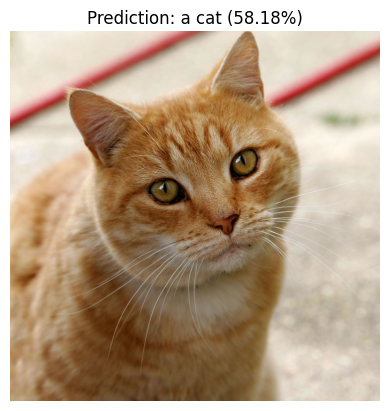

In [7]:
labels = ["a cat", "a dog", "a car", "a tree", "a person", "a building", "an animal", "a plant"]

image_path = "/Users/danweizuo/Documents/Videos/Cat03.jpg"

if os.path.isfile(image_path):

    label, confidence = classify_image(image_path, labels)
    print(f"Prediction: {label} (Confidence: {confidence * 100:.2f}%)")
else:
    print("Image file not found. Please check the file path and try again.")

img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Prediction: {label} ({confidence * 100:.2f}%)")
plt.axis("off")
plt.show()